In [345]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.metrics import accuracy_score, precision_score, recall_score, log_loss, f1_score
from sklearn.metrics import f1_score, auc, roc_curve, plot_confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

In [385]:
# Loads the saved pickle file data

file = open('./Pickle Files/Node2Vec_Pre-Processing_Data.pickle','rb')
new_unconnected_df = pickle.load(file)
node2vec_model = pickle.load(file)
X_train = pickle.load(file)
X_test = pickle.load(file)
y_train = pickle.load(file)
y_test = pickle.load(file)

file = open('./Pickle Files/Data_Wrangling_Data.pickle','rb')
_ = pickle.load(file)
G = pickle.load(file)

# Node2Vec Modeling Approach

# Logistic Regression Classifier

1. Uses GridSearchCV for hyperparameter tuning to pick best model version

In [307]:
lr = LogisticRegression(random_state = 0, max_iter = 1000)
param_grid = {'C': [0.01,0.1,1]}
gs_lr = GridSearchCV(lr, param_grid = param_grid, scoring = 'accuracy', cv = 3, n_jobs = -1)
gs_lr.fit(X_train, y_train)
lr = gs_lr.best_estimator_
print(lr)

LogisticRegression(C=0.01, max_iter=1000, random_state=0)


2. Fits model & makes predictions

In [308]:
y_pred_lr = lr.predict(X_test)

3. Calculates Accuracy, Precision, Recall, F1 Score, Log-Loss, AUC-ROC

In [309]:
# Classification Report

print(classification_report(y_test, y_pred_lr, zero_division = 0))

              precision    recall  f1-score   support

           0       0.68      0.69      0.69     17000
           1       0.68      0.68      0.68     16840

    accuracy                           0.68     33840
   macro avg       0.68      0.68      0.68     33840
weighted avg       0.68      0.68      0.68     33840



In [310]:
# Computes Accuracy, Precision, Recall, F1 Score, Log-Loss

accuracy, precision, recall, f1, logloss = [], [], [], [], []

accuracy.append(round(accuracy_score(y_test, y_pred_lr),2))
precision.append(round(precision_score(y_test, y_pred_lr, average = 'macro', zero_division = 0),2))
recall.append(round(recall_score(y_test, y_pred_lr, average = 'macro'),2))
f1.append(round(f1_score(y_test, y_pred_lr, average = 'macro'),2))
lr_probas = lr.predict_proba(X_test)
logloss.append(round(log_loss(y_test, lr_probas),2))

print('Accuracy: {}'.format(accuracy[-1]))
print('Precision: {}'.format(precision[-1]))
print('Recall: {}'.format(recall[-1])) 
print('F1-Score: {}'.format(f1[-1]))
print('Log Loss: {}'.format(logloss[-1]))

Accuracy: 0.68
Precision: 0.68
Recall: 0.68
F1-Score: 0.68
Log Loss: 0.6


In [311]:
# Computer AUC-ROC

fpr = dict()
tpr = dict() 
roc_auc = dict()
colors = ['blue', 'red', 'green', 'purple']

probs = lr.predict_proba(X_test)[:,1]

fpr["Logistic Regression"], tpr["Logistic Regression"], _ = roc_curve(y_test, probs)
roc_auc["Logistic Regression"] = auc(fpr["Logistic Regression"], tpr["Logistic Regression"])                           

print('Logistic Regression AUC-ROC {0:.2f}'.format(roc_auc['Logistic Regression']))

Logistic Regression AUC-ROC 0.74


4. Prints Confusion Matrix

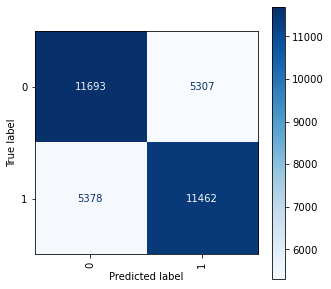

In [312]:
fig, ax = plt.subplots(figsize=(5, 5))
disp = plot_confusion_matrix(lr, X_test, y_test, cmap = plt.cm.Blues, ax = ax, xticks_rotation = 'vertical')
plt.show()

# Random Forest Classifier

1. Uses GridSearchCV for hyperparameter tuning to pick best model version

In [313]:
rf = RandomForestClassifier(random_state = 0)
param_grid = {'n_estimators': [100,300,500]}
gs_rf = GridSearchCV(rf, param_grid = param_grid, scoring = 'accuracy', cv = 3, n_jobs = -1)
gs_rf.fit(X_train, y_train)
rf = gs_rf.best_estimator_
print(rf)

RandomForestClassifier(n_estimators=500, random_state=0)


2. Fits model & makes predictions

In [314]:
y_pred_rf = rf.predict(X_test)

3. Calculates Accuracy, Precision, Recall, F1 Score, Log-Loss, AUC-ROC

In [315]:
# Classification Report

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84     17000
           1       0.83      0.85      0.84     16840

    accuracy                           0.84     33840
   macro avg       0.84      0.84      0.84     33840
weighted avg       0.84      0.84      0.84     33840



In [316]:
# Computes Accuracy, Precision, Recall, F1 Score, Log-Loss

accuracy.append(round(accuracy_score(y_test, y_pred_rf),2))
precision.append(round(precision_score(y_test, y_pred_rf, average = 'macro'),2))
recall.append(round(recall_score(y_test, y_pred_rf, average = 'macro'),2))
f1.append(round(f1_score(y_test, y_pred_rf, average = 'macro'),2))
rf_probas = rf.predict_proba(X_test)
logloss.append(round(log_loss(y_test, rf_probas),2))

print('Accuracy: {}'.format(accuracy[-1]))
print('Precision: {}'.format(precision[-1]))
print('Recall: {}'.format(recall[-1])) 
print('F1-Score: {}'.format(f1[-1]))
print('Log Loss: {}'.format(logloss[-1]))

Accuracy: 0.84
Precision: 0.84
Recall: 0.84
F1-Score: 0.84
Log Loss: 0.39


In [317]:
# Computer AUC-ROC

rf_probs = rf.predict_proba(X_test)[:,1]

fpr["Random Forest"], tpr["Random Forest"], _ = roc_curve(y_test, rf_probs)
roc_auc["Random Forest"] = auc(fpr["Random Forest"], tpr["Random Forest"])                           

print('Random Forest ROC Curve Area {0:.2f}'.format(roc_auc['Random Forest']))

Random Forest ROC Curve Area 0.90


4. Prints Confusion Matrix

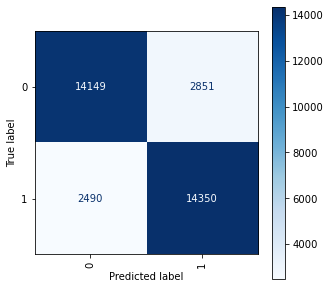

In [319]:
fig, ax = plt.subplots(figsize=(5, 5))
disp = plot_confusion_matrix(rf, X_test, y_test, cmap = plt.cm.Blues, ax = ax, xticks_rotation = 'vertical')
plt.show()

# Gradient Boosting Classifier

1. Uses GridSearchCV for hyperparameter tuning to pick best model version

In [320]:
gb = GradientBoostingClassifier(random_state = 0)
param_grid = {'learning_rate': [0.01,0.05,0.1]}
gs_gb = GridSearchCV(gb, param_grid = param_grid, scoring = 'accuracy', cv = 3, n_jobs = -1)
gs_gb.fit(X_train, y_train)
gb = gs_gb.best_estimator_
print(gb)

GradientBoostingClassifier(random_state=0)


2. Fits model & makes predictions

In [321]:
y_pred_gb = gb.predict(X_test)

3. Calculates Accuracy, Precision, Recall, F1 Score, Log-Loss, AUC-ROC

In [322]:
# Classification Report

print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81     17000
           1       0.83      0.74      0.78     16840

    accuracy                           0.80     33840
   macro avg       0.80      0.80      0.79     33840
weighted avg       0.80      0.80      0.79     33840



In [323]:
# Computes Accuracy, Precision, Recall, F1 Score, Log-Loss

accuracy.append(round(accuracy_score(y_test, y_pred_gb),2))
precision.append(round(precision_score(y_test, y_pred_gb, average = 'macro'),2))
recall.append(round(recall_score(y_test, y_pred_gb, average = 'macro'),2))
f1.append(round(f1_score(y_test, y_pred_gb, average = 'macro'),2))
gb_probas = gb.predict_proba(X_test)
logloss.append(round(log_loss(y_test, gb_probas),2))

print('Accuracy: {}'.format(accuracy[-1]))
print('Precision: {}'.format(precision[-1]))
print('Recall: {}'.format(recall[-1])) 
print('F1-Score: {}'.format(f1[-1]))
print('Log Loss: {}'.format(logloss[-1]))

Accuracy: 0.8
Precision: 0.8
Recall: 0.8
F1-Score: 0.79
Log Loss: 0.48


In [324]:
# Computer AUC-ROC

gb_probs = gb.predict_proba(X_test)[:,1]

fpr["Gradient Boosting"], tpr["Gradient Boosting"], _ = roc_curve(y_test, gb_probs)
roc_auc["Gradient Boosting"] = auc(fpr["Gradient Boosting"], tpr["Gradient Boosting"])                           

print('Gradient Boosting ROC Curve Area {0:.2f}'.format(roc_auc['Gradient Boosting']))

Gradient Boosting ROC Curve Area 0.86


4. Prints Confusion Matrix

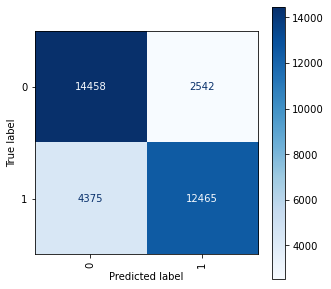

In [325]:
fig, ax = plt.subplots(figsize=(5, 5))
disp = plot_confusion_matrix(gb, X_test, y_test, cmap = plt.cm.Blues, ax = ax, xticks_rotation = 'vertical')
plt.show()

# Multi-layer Perceptron Classifier (Neural Network Classifier)

1. Uses GridSearchCV for hyperparameter tuning to pick best model version

In [328]:
mlp = MLPClassifier(random_state = 0, max_iter = 1000)
param_grid = {'activation': ['tanh','relu'], 'solver': ['sgd','adam']}
gs_mlp = GridSearchCV(mlp, param_grid = param_grid, scoring = 'accuracy')
gs_mlp.fit(X_train, y_train)
mlp = gs_mlp.best_estimator_
print(mlp)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', max_iter=1000, random_state=0, solver='sgd')


2. Fits model & makes predictions

In [329]:
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

3. Calculates Accuracy, Precision, Recall, F1 Score, Log-Loss, AUC-ROC

In [330]:
# Classification Report

print(classification_report(y_test, y_pred_mlp))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85     17000
           1       0.82      0.90      0.86     16840

    accuracy                           0.85     33840
   macro avg       0.86      0.85      0.85     33840
weighted avg       0.86      0.85      0.85     33840



In [331]:
# Computes Accuracy, Precision, Recall, F1 Score, Log-Loss

accuracy.append(round(accuracy_score(y_test, y_pred_mlp),2))
precision.append(round(precision_score(y_test, y_pred_mlp, average = 'macro'),2))
recall.append(round(recall_score(y_test, y_pred_mlp, average = 'macro'),2))
f1.append(round(f1_score(y_test, y_pred_mlp, average = 'macro'),2))
mlp_probas = mlp.predict_proba(X_test)
logloss.append(round(log_loss(y_test, mlp_probas),2))

print('Accuracy: {}'.format(accuracy[-1]))
print('Precision: {}'.format(precision[-1]))
print('Recall: {}'.format(recall[-1])) 
print('F1-Score: {}'.format(f1[-1]))
print('Log Loss: {}'.format(logloss[-1]))

Accuracy: 0.85
Precision: 0.86
Recall: 0.85
F1-Score: 0.85
Log Loss: 0.35


In [332]:
# Computer AUC-ROC

mlp_probs = mlp.predict_proba(X_test)[:,1]

fpr["Neural Network"], tpr["Neural Network"], _ = roc_curve(y_test, mlp_probs)
roc_auc["Neural Network"] = auc(fpr["Neural Network"], tpr["Neural Network"])                           

print('Neural Network ROC Curve Area {0:.2f}'.format(roc_auc['Neural Network']))

Neural Network ROC Curve Area 0.92


4. Prints Confusion Matrix

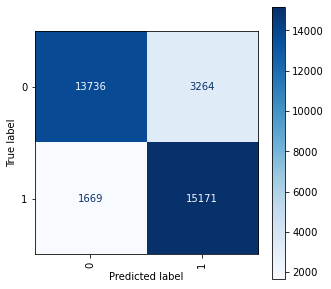

In [333]:
fig, ax = plt.subplots(figsize=(5, 5))
disp = plot_confusion_matrix(mlp, X_test, y_test, cmap = plt.cm.Blues, ax = ax, xticks_rotation = 'vertical')
plt.show()

# Model Comparison

1. Compares models accuracies: Creates 5 bar plots for each of the metrics of accuracy, precision, recall, F1-score, log-loss metrics for each of the 4 models

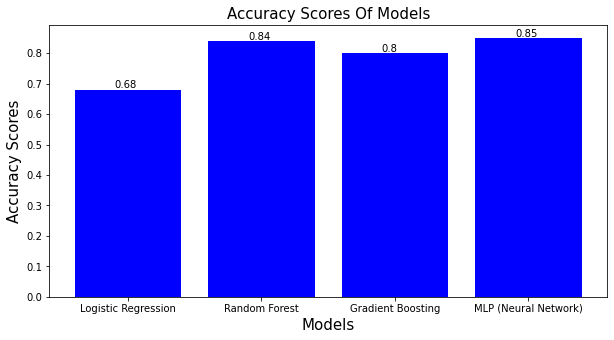

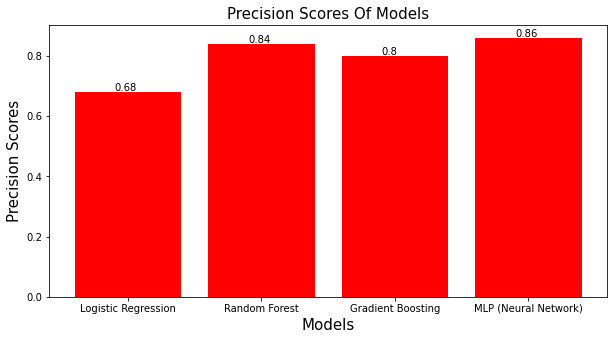

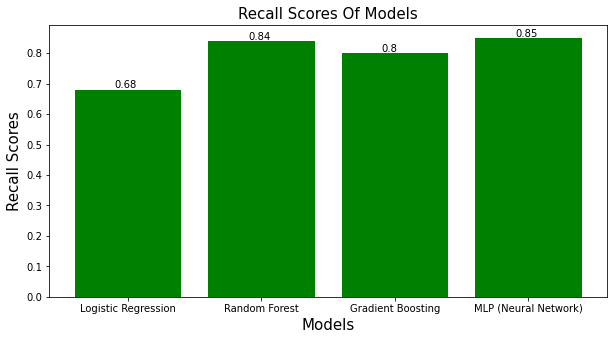

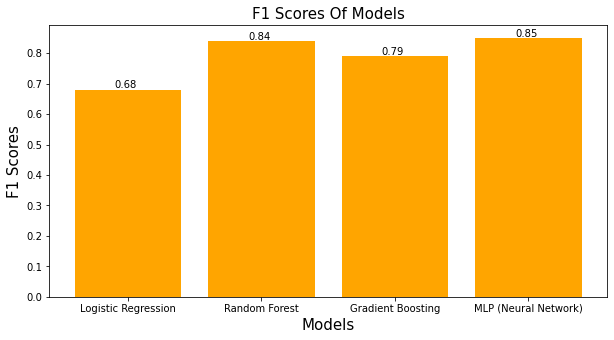

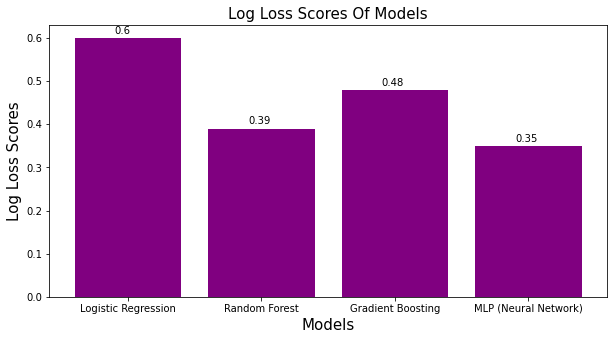

In [334]:
labels = ['Logistic Regression','Random Forest','Gradient Boosting', 'MLP (Neural Network)']

# Plotting Accuracy Scores
plt.figure(figsize = (10,5))
plt.xlabel('Models', fontsize = 15)
plt.ylabel('Accuracy Scores', fontsize = 15)
plt.title('Accuracy Scores Of Models', fontsize = 15)

bars = plt.bar(labels, accuracy, color = 'blue')
for bar in bars:
    plt.text(bar.get_x() + 0.3, bar.get_height() + 0.005, bar.get_height())
plt.show()

# Plotting Precision Scores
plt.figure(figsize = (10,5))
plt.xlabel('Models', fontsize = 15)
plt.ylabel('Precision Scores', fontsize = 15)
plt.title('Precision Scores Of Models', fontsize = 15)

bars = plt.bar(labels, precision, color = 'red')
for bar in bars:
    plt.text(bar.get_x() + 0.3, bar.get_height() + 0.005, bar.get_height())
plt.show()

# Plotting Recall Scores
plt.figure(figsize = (10,5))
plt.xlabel('Models', fontsize = 15)
plt.ylabel('Recall Scores', fontsize = 15)
plt.title('Recall Scores Of Models', fontsize = 15)

bars = plt.bar(labels, recall, color = 'green')
for bar in bars:
    plt.text(bar.get_x() + 0.3, bar.get_height() + 0.005, bar.get_height())
plt.show()

# Plotting F1 Scores
plt.figure(figsize = (10,5))
plt.xlabel('Models', fontsize = 15)
plt.ylabel('F1 Scores', fontsize = 15)
plt.title('F1 Scores Of Models', fontsize = 15)

bars = plt.bar(labels, f1, color = 'orange')
for bar in bars:
    plt.text(bar.get_x() + 0.3, bar.get_height() + 0.005, bar.get_height())
plt.show()

# Plotting Log Loss Scores
plt.figure(figsize = (10,5))
plt.xlabel('Models', fontsize = 15)
plt.ylabel('Log Loss Scores', fontsize = 15)
plt.title('Log Loss Scores Of Models', fontsize = 15)

bars = plt.bar(labels, logloss, color = 'purple')
for bar in bars: 
    plt.text(bar.get_x() + 0.3, bar.get_height() + 0.01, bar.get_height())
plt.show()

2. Compares models AUC-ROC

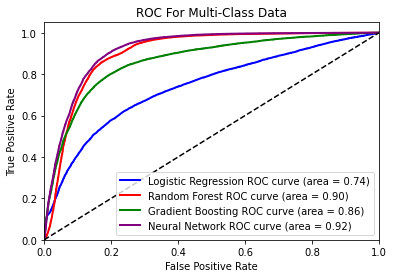

In [335]:
for fp, tp, color, roc in zip(fpr, tpr, colors, roc_auc): 
    plt.plot(fpr[fp], tpr[tp], color = color, lw = 2, label = '{0} ROC curve (area = {1:0.2f})'.format(roc, roc_auc[roc]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC For Multi-Class Data')
plt.legend(loc = "lower right")
plt.show()

# Facebook Friend Recommender

Iterates through a specific node's unconnected pairs and displays the top k recommended friends as requested by the user

In [338]:
# Gets probabilites for each unconnected pair that includes the user requested user # and prints the top k as requested by user

def recommend_friends():
    
    df = []
    
    # Prompts the user for user to recommend friends for
    while True: 
        
        num = input(f'Please enter the user (0-4038) to get friend recommendations for:\n')
        try: int(num)
        except ValueError: continue
        num = int(num)
        if not (num >= 0 and num < len(G.nodes)): continue
        else: break
    
    df = new_unconnected_df[(new_unconnected_df.loc[:,'Node 1'] == num) | (new_unconnected_df.loc[:,'Node 2'] == num)]
    
    # Prompts the user for how many recommmendations they want
    while True:
        k = input(f'Please enter the k number of friend recommendations out of {len(df)} that you would like to recieve:\n')
        try: int(k)
        except ValueError: continue
        k = int(k)
        if not (k > 0 and k <= len(df)): continue
        else: break
       
    # Finds the top most likely unconnected node future links and their probabilities of linking to the specific user specified
    features = []
    for i,j in zip(df['Node 1'], df['Node 2']):
        features.append(node2vec_model.wv[str(i)] + node2vec_model.wv[str(j)])
    
    features = np.array(features) 
    
    top_k_indices = np.flip(np.argsort(mlp.predict_proba(features)[:,1]))[0:k]
    
    rec_friends, node = {}, ''
    
    # Stores the user values and probabilites in a dictionary
    for i in top_k_indices:
        
        if df.iloc[i]['Node 1'] != num: node = 'Node 1'
        else: node = 'Node 2'
    
        rec_friends[df.iloc[i][node]] = round(mlp.predict_proba(features)[:,1][i] * 100,2)
    
    # Prints the most likely future recommended friends
    print(f'Friend recommendations for user {num} are:\n')
    for u,p in rec_friends.items():
        print(f'User {u} at {p}% chance of a future link') 

In [339]:
recommend_friends()

Please enter the user (0-4038) to get friend recommendations for:
65
Please enter the k number of friend recommendations out of 22 that you would like to recieve:
22
Friend recommendations for user 65 are:

User 168 at 82.56% chance of a future link
User 221 at 73.65% chance of a future link
User 315 at 66.85% chance of a future link
User 56 at 62.53% chance of a future link
User 274 at 54.61% chance of a future link
User 75 at 53.54% chance of a future link
User 325 at 53.07% chance of a future link
User 3 at 48.2% chance of a future link
User 30 at 42.2% chance of a future link
User 73 at 29.01% chance of a future link
User 234 at 18.27% chance of a future link
User 229 at 17.61% chance of a future link
User 55 at 13.17% chance of a future link
User 92 at 10.66% chance of a future link
User 195 at 10.35% chance of a future link
User 177 at 4.59% chance of a future link
User 139 at 3.42% chance of a future link
User 167 at 0.55% chance of a future link
User 81 at 0.35% chance of a fut

In [381]:
# Saves models to pickle file

file = open('./Pickle Files/Node2Vec_Models.pickle','wb')
pickle.dump(lr, file)
pickle.dump(rf, file)
pickle.dump(gb, file)
pickle.dump(mlp, file)